## Empirical Performance Evaluation
### Comparison of Tree Reconstruction Algorithms with and without Missing Data

C:\Users\11387\AppData\Local\Temp\ipykernel_22032\1651381347.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\11387\AppData\Local\Temp\ipykernel_22032\1651381347.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["MAX-Cut", "Vanilla Greedy", "UPGMA", "Neighbor Joining"])
C:\Users\11387\AppData\Local\Temp\ipykernel_22032\1651381347.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\11387\AppData\Local\Temp\ipykernel_22032\1651381347.py:152: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usi

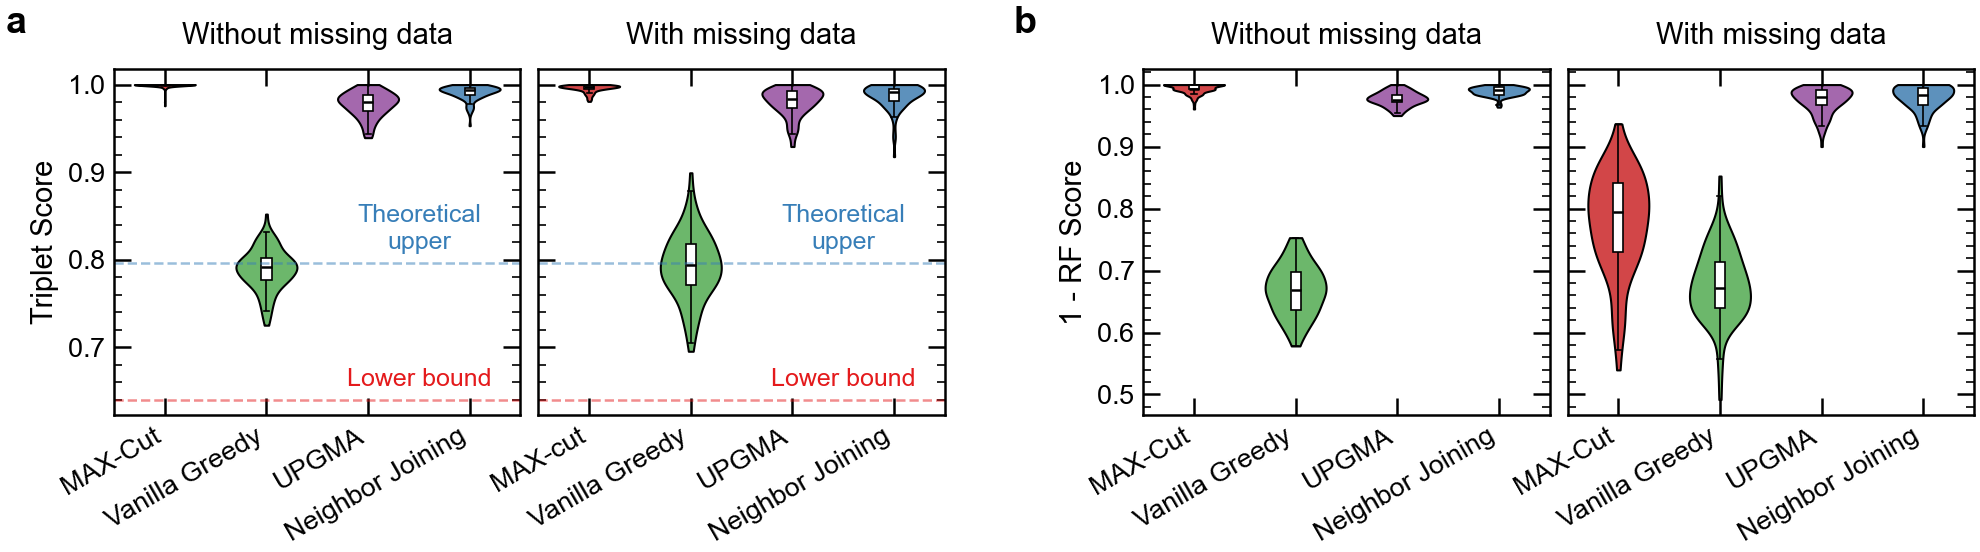

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import matplotlib as mpl
from matplotlib import font_manager
import matplotlib.ticker as mticker
from plot_style import configure_journal_style

# =================== 数据读取 ===================
rf_df1 = pd.read_csv("rf_scores_without_missing.csv")
triplets_df1 = pd.read_csv("triplet_scores_without_missing.csv")
rf_df2 = pd.read_csv("rf_scores_with_missing.csv")
triplets_df2 = pd.read_csv("triplet_scores_with_missing.csv")

# =================== 颜色设置 ===================
base_colors = ["#E92F32", "#5FC45E","#AD5CB9", "#4D93CC" ]
fill_colors = base_colors      # 内外一致

# =================== 计算 1 - RF ===================
rf_df1["1 - RF_Score"] = 1 - rf_df1["RF_Score"]
rf_df2["1 - RF_Score"] = 1 - rf_df2["RF_Score"]

# =================== 小提琴轮廓设置 ===================
def set_violin_colors(ax, edge_colors, face_colors):
    for i, collection in enumerate(ax.collections):
        if isinstance(collection, PolyCollection):
            collection.set_edgecolor(edge_colors[i % len(edge_colors)])
            collection.set_facecolor(face_colors[i % len(face_colors)])
            collection.set_linewidth(1)

def set_violin_edge_black(ax, lw=0.5):
    """把当前轴里所有 violin 的边框改成黑色"""
    for coll in ax.collections:
        if isinstance(coll, PolyCollection):
            coll.set_edgecolor("black")
            coll.set_linewidth(lw)

# =================== 内部箱式图变细 ===================
def thin_inner_box(ax, scale=0.05):
    """
    缩小 violinplot 内部 box 的宽度
    """
    for artist in ax.artists:
        try:
            original_width = artist.get_width()
            artist.set_width(original_width * scale)
        except:
            pass

# =================== 2x2，单个子图 35mm(≈1.38inch) ===================
# =================== 2x2 → 1x4 布局 ===================
configure_journal_style()

# 一排四个子图
fig = plt.figure(figsize=(8, 1.5))

# 5 列：前两列一组，中间一列作为空白，后两列一组
gs = fig.add_gridspec(
    1, 5,
    width_ratios=[1, 1, 0.4, 1, 1],  # 中间 0.4 列当“空隙”，左右两组靠得近
    wspace=0.05                       # 组内间距很小
)

# 左边两张：sharey，让它们真正共用同一个 y 轴
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1], sharey=ax0)

# 中间空白轴（只是撑开距离）
ax_space = fig.add_subplot(gs[0, 2])
ax_space.axis("off")

# 右边两张：另一组共用一个 y 轴
ax2 = fig.add_subplot(gs[0, 3])
ax3 = fig.add_subplot(gs[0, 4], sharey=ax2)

axes = [ax0, ax1, ax2, ax3]


# =================== 绘图 ===================

# -------- A-left: Triplet, without missing --------
sns.violinplot(
    ax=axes[0],
    data=triplets_df1,
    x="Algorithm", y="Triplet_Score",
    palette=base_colors,
    inner=None, cut=0,
    linewidth=0.5, width=0.6,
)
set_violin_edge_black(axes[0])
sns.boxplot(
    ax=axes[0],
    data=triplets_df1,
    x="Algorithm", y="Triplet_Score",
    width=0.10, showcaps=True, showfliers=False,
    boxprops=dict(facecolor="white", edgecolor="black", linewidth=0.4),
    whiskerprops=dict(color="black", linewidth=0.4),
    capprops=dict(color="black", linewidth=0.4),
    medianprops=dict(color="black", linewidth=0.6),
)

# 只在 A-left 画红线 + 文字（和你目标图一致）
axes[0].axhline(y=0.64, color='#E41A1C', linestyle='--', linewidth=0.6, alpha=0.5)
axes[0].text(2.5, 0.64+ 0.01, "Lower bound",
             color='#E41A1C', fontsize=6, va='bottom', ha='center')

# 理论上界线
axes[0].axhline(y=0.7966, color='#377EB8', linestyle='--', linewidth=0.6, alpha=0.5)
axes[0].text(2.5, 0.7966 + 0.01, "Theoretical\nupper",
             color='#377EB8', fontsize=6, va='bottom', ha='center', multialignment='center')


axes[0].set_ylabel("Triplet Score")
axes[0].set_xticklabels(["MAX-Cut", "Vanilla Greedy", "UPGMA", "Neighbor Joining"])
axes[0].set_title("Without missing data", fontsize=7)
plt.setp(axes[0].get_xticklabels(), rotation=30, ha="right")


# -------- A-right: Triplet, with missing --------
sns.violinplot(
    ax=axes[1],
    data=triplets_df2,
    x="Algorithm", y="Triplet_Score",
    palette=base_colors,
    inner=None, cut=0,
    linewidth=0.5, width=0.6,
)
set_violin_edge_black(axes[1])
sns.boxplot(
    ax=axes[1],
    data=triplets_df2,
    x="Algorithm", y="Triplet_Score",
    width=0.10, showcaps=True, showfliers=False,
    boxprops=dict(facecolor="white", edgecolor="black", linewidth=0.4),
    whiskerprops=dict(color="black", linewidth=0.4),
    capprops=dict(color="black", linewidth=0.4),
    medianprops=dict(color="black", linewidth=0.6),
)

axes[1].axhline(y=0.64, color='#E41A1C', linestyle='--', linewidth=0.6, alpha=0.5)
axes[1].text(2.5, 0.64+ 0.01, "Lower bound",
             color='#E41A1C', fontsize=6, va='bottom', ha='center')

# 理论上界线
axes[1].axhline(y=0.7966, color='#377EB8', linestyle='--', linewidth=0.6, alpha=0.5)
axes[1].text(2.5, 0.7966 + 0.01, "Theoretical\nupper",
             color='#377EB8', fontsize=6, va='bottom', ha='center', multialignment='center')


axes[1].set_ylabel("")          # 右图不重复 y 轴标签
axes[1].set_xticklabels(["MAX-cut", "Vanilla Greedy", "UPGMA", "Neighbor Joining"])
axes[1].set_title("With missing data", fontsize=7)
plt.setp(axes[1].get_xticklabels(), rotation=30, ha="right")


# -------- B-left: 1-RF, without missing --------
sns.violinplot(
    ax=axes[2],
    data=rf_df1,
    x="Algorithm", y="1 - RF_Score",
    palette=base_colors,
    inner=None, cut=0,
    linewidth=0.5, width=0.6,
)
set_violin_edge_black(axes[2])
sns.boxplot(
    ax=axes[2],
    data=rf_df1,
    x="Algorithm", y="1 - RF_Score",
    width=0.10, showcaps=True, showfliers=False,
    boxprops=dict(facecolor="white", edgecolor="black", linewidth=0.4),
    whiskerprops=dict(color="black", linewidth=0.4),
    capprops=dict(color="black", linewidth=0.4),
    medianprops=dict(color="black", linewidth=0.6),
)
axes[2].set_ylabel("1 - RF Score")
axes[2].set_xticklabels(["MAX-Cut", "Vanilla Greedy", "UPGMA", "Neighbor Joining"])
axes[2].set_title("Without missing data", fontsize=7)
plt.setp(axes[2].get_xticklabels(), rotation=30, ha="right")


# -------- B-right: 1-RF, with missing --------
sns.violinplot(
    ax=axes[3],
    data=rf_df2,
    x="Algorithm", y="1 - RF_Score",
    palette=base_colors,
    inner=None, cut=0,
    linewidth=0.5, width=0.6,
)
set_violin_edge_black(axes[3])
sns.boxplot(
    ax=axes[3],
    data=rf_df2,
    x="Algorithm", y="1 - RF_Score",
    width=0.10, showcaps=True, showfliers=False,
    boxprops=dict(facecolor="white", edgecolor="black", linewidth=0.4),
    whiskerprops=dict(color="black", linewidth=0.4),
    capprops=dict(color="black", linewidth=0.4),
    medianprops=dict(color="black", linewidth=0.6),
)
axes[3].set_ylabel("")
axes[3].set_xticklabels(["MAX-Cut", "Vanilla Greedy", "UPGMA", "Neighbor Joining"])
axes[3].set_title("With missing data", fontsize=7)
plt.setp(axes[3].get_xticklabels(), rotation=30, ha="right")


# -------- x 轴刻度：只保留 4 个主刻度、无 minor --------
for ax in axes:
    ax.xaxis.set_major_locator(mticker.FixedLocator(range(4)))
    ax.xaxis.set_minor_locator(mticker.NullLocator())


# -------- A / B 大面板标签（加粗） --------
fig.text(0.08, 1.02, 'a', fontsize=9, fontweight='bold',
         va='top', ha='left')

fig.text(0.50, 1.02, 'b', fontsize=9, fontweight='bold',
         va='top', ha='left')

# 右边两个子图的 y 轴刻度和标签隐藏，只让每组左侧那张显示
for ax in (ax1, ax3):
    ax.set_ylabel("")                                     # 不要重复 y 轴标题
    ax.tick_params(axis="y", which="both", labelleft=False)  # 保留刻度线，只隐藏数字
    # 不要写 left=False，这样刻度线就还在
for ax in axes:
    ax.set_xlabel("")          # 不显示任何文字
    # 或者：ax.xaxis.label.set_visible(False)

# 统一 Triplet 两个子图的 y 轴范围
ymin = min(axes[0].get_ylim()[0], axes[1].get_ylim()[0])
ymax = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(ymin, ymax)
axes[1].set_ylim(ymin, ymax)

# 统一 RF 两个子图的 y 轴范围
ymin = min(axes[2].get_ylim()[0], axes[3].get_ylim()[0])
ymax = max(axes[2].get_ylim()[1], axes[3].get_ylim()[1])
axes[2].set_ylim(ymin, ymax)
axes[3].set_ylim(ymin, ymax)

# 布局：预留顶部给 A/B 标签
fig.tight_layout(rect=[0.03, 0.12, 0.99, 0.90])

plt.savefig('Fig5.pdf', dpi=300, bbox_inches='tight')
plt.show()
